In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets


In [3]:
iris = datasets.load_iris()

In [11]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [16]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [18]:
class NullHypothesisClassifier:
   def fit(self, X, y):
       self.majority_class = np.argmax(np.bincount(list(y_train)))
   
   def predict(self, X):
       return np.ones(X.shape[0]) * self.majority_class

class RandomClassifier:
   def fit(self, X, y):
       self.classes = np.unique(y_train)
   
   def predict(self, X):
       return np.random.choice(self.classes, X.shape[0])

In [64]:
X = iris.data
y = iris.target

In [89]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #, random_state=0)

In [90]:
null_hypothesis_clf = NullHypothesisClassifier()
null_hypothesis_clf.fit(X_train, y_train)

In [91]:
random_clf = RandomClassifier()
random_clf.fit(X_train, y_train)

In [92]:
null_hypothesis_clf.predict(X_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [93]:
random_clf.predict(X_test)

array([0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0,
       1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 2,
       2, 1, 2, 1, 1, 0])

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_true=y_test, y_pred=null_hypothesis_clf.predict(X_test))

0.28

In [96]:
np.mean([accuracy_score(y_true=y_test, y_pred=random_clf.predict(X_test)) for _ in range(1000)])

0.33312

In [44]:
from sklearn.svm import LinearSVC

In [46]:
clf = LinearSVC()

In [47]:
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [50]:
accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))

0.94

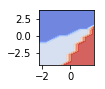

In [61]:
def make_meshgrid(x, y, h=.02):
   '''Create a mesh of points to plot in

   Parameters
   ----------
   x: data to base x-axis meshgrid on
   y: data to base y-axis meshgrid on
   h: stepsize for meshgrid, optional

   Returns
   -------
   xx, yy : ndarray
   '''
   x_min, x_max = x.min() - 1, x.max() + 1
   y_min, y_max = y.min() - 1, y.max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
   return xx, yy


def plot_contours(clf, xx, yy, **params):
   '''Plot the decision boundaries for a classifier.

   Parameters
   ----------
   ax: matplotlib axes object
   clf: a classifier
   xx: meshgrid ndarray
   yy: meshgrid ndarray
   params: dictionary of params to pass to contourf, optional
   '''
   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)
   out = plt.contourf(xx, yy, Z, **params)
   return out

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train, y_train)

X = pca.transform(X_test)
X1, X0 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1, h=0.5)

clf = LinearSVC()
clf.fit(pca.transform(X_train), y_train)

plt.figure(figsize=(1,1))
plot_contours(clf, xx, yy,
             cmap=plt.cm.coolwarm, alpha=0.8);
# plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [57]:
X

array([[ 1.55234275, -0.63259399],
       [ 0.22795291, -0.57428287],
       [-2.58661233,  1.13578962],
       [ 2.92023306,  0.25963317],
       [-2.64044   ,  0.20958866],
       [ 2.51203124, -0.12217716],
       [-2.7811418 ,  0.30798199],
       [ 1.21123568,  0.34812826],
       [ 1.31723316,  0.1871147 ],
       [ 0.33554995, -0.10656891],
       [ 1.74583787, -0.56054088],
       [ 0.92117914,  0.26378314],
       [ 0.89556022, -0.22462428],
       [ 1.06928157,  0.01817738],
       [ 0.9609159 , -0.17490779],
       [-2.69525083, -0.06247489],
       [ 0.78865399, -0.21426931],
       [ 0.42570473, -0.70370816],
       [-2.74028916, -0.20495441],
       [-2.61908118,  0.84737617],
       [ 1.16313496, -0.67861723],
       [ 0.63098989, -0.40045392],
       [-2.37565512,  0.00590967],
       [-2.921204  , -0.52544771],
       [ 1.23344495, -0.2481136 ],
       [-3.22998203,  0.18900002],
       [-2.21561913,  0.46889073],
       [ 0.62246597, -0.02439146],
       [-0.75261071,